# Who leaves Zurich?
Since 1993 the population of Zurich grew by more than 60'000 people, or 17 percent. In the last four years a lot of people focus on the people coming in to the city. This is reasonable. Since 2005 there where always more people coming in then leaving and changing the city. But then, every year are people leaving the city. Who are those? As a lot of older buildings have been replaced by new ones in the last few years and there, I thought that maybe a lot of old people have to leave the city, because they cannot pay the rent in the new building anymore.

In [324]:
import pandas as pd
import requests
import time 
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from cycler import cycler
plt.rcParams.update(
    {'pdf.fonttype':42,
    'ps.fonttype': 42
})
import numpy
import re
import seaborn as sns



In [191]:
df = pd.read_csv('bev352od3522.csv')
df.head()

,StichtagDatJahr,WegBezirkHistSort,WegBezirkHistLang,WegKtHistSort,WegKtHistLang,WegLandHistSort,WegLandHistLang,WegRegionSort,WegRegionLang,WegKontinentSort,WegKontinentLang,QuarSort,QuarLang,KreisSort,AlterV10Sort,AlterV10Kurz,SexKurz,Ziv2Sort,Ziv2Lang,AnzWezuWir
0,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,1,0-9,M,1,Ledig,2
1,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,3,20-29,M,1,Ledig,1
2,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,3,20-29,W,1,Ledig,1
3,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,4,30-39,M,2,Verheiratet,2
4,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,4,30-39,W,2,Verheiratet,1


Get the sum of the ones who move out (within Switzerland) groubby Age

In [192]:
df_age = pd.DataFrame()
container = pd.DataFrame()

for year in list(set(df['StichtagDatJahr'])):
    container = pd.DataFrame(df[(df['StichtagDatJahr']==year) & (df['WegLandHistLang']=='Schweiz')].groupby(['AlterV10Kurz','StichtagDatJahr', 'SexKurz', 'Ziv2Lang'], as_index=False)['AnzWezuWir'].sum())
    df_age = pd.concat([df_age, container])

df_age.head()


,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir
0,0-9,1993,M,Ledig,699
1,0-9,1993,W,Ledig,734
2,10-19,1993,M,Ledig,407
3,10-19,1993,M,Verheiratet,4
4,10-19,1993,W,Ledig,528


Write a function to calculate the percentage

In [193]:
def get_percentage(row):
    percentage = row['AnzWezuWir']/df[(df['StichtagDatJahr']==row['StichtagDatJahr']) & (df['WegLandHistLang']=='Schweiz')].AnzWezuWir.sum()*100
    return pd.Series({
        'percentage': percentage
        })

In [194]:
df_age['percentage'] = df_age.apply(get_percentage, axis=1)


In [195]:
df_percentage_all = df_age
df_age.head(11)

,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir,percentage
0,0-9,1993,M,Ledig,699,3.607742
1,0-9,1993,W,Ledig,734,3.788387
2,10-19,1993,M,Ledig,407,2.100645
3,10-19,1993,M,Verheiratet,4,0.020645
4,10-19,1993,W,Ledig,528,2.725161
5,10-19,1993,W,Verheiratet,28,0.144516
6,20-29,1993,M,Geschieden,42,0.216774
7,20-29,1993,M,Ledig,3861,19.927742
8,20-29,1993,M,Verheiratet,700,3.612903
9,20-29,1993,M,Verwitwet,2,0.010323


Create new age-labels that suit my hypothesis

In [196]:
def get_agelabel(row):
    if row['AlterV10Kurz']=="0-9":
        return "0-9"
    if row['AlterV10Kurz']=="10-19":
        return "10-19"
    if row['AlterV10Kurz']=="20-29":
        return "20-29"
    if row['AlterV10Kurz']=="30-39":
        return "30-39"
    if row['AlterV10Kurz']=="40-49":
        return "40-49"
    if row['AlterV10Kurz']=="50-59":
        return "50-59"
    if row['AlterV10Kurz']=="60-69":
        return "60-69"
    if row['AlterV10Kurz']=="70-79":
        return "70+"
    if row['AlterV10Kurz']=="80-89":
        return "70+"    
    if row['AlterV10Kurz']=="90-99":
        return "70+"
    if row['AlterV10Kurz']=="100 u. älter":
        return "70+"
    else:
        return 'other'
    

In [197]:
#run the function. Attention it needs some time to calculate it.
df_percentage_all['age_label'] = df_percentage_all.apply(get_agelabel, axis=1)
df_age = df_percentage_all
df_age.head(5)

,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir,percentage,age_label
0,0-9,1993,M,Ledig,699,3.607742,0-9
1,0-9,1993,W,Ledig,734,3.788387,0-9
2,10-19,1993,M,Ledig,407,2.100645,10-19
3,10-19,1993,M,Verheiratet,4,0.020645,10-19
4,10-19,1993,W,Ledig,528,2.725161,10-19


In [198]:
#calculate the sum of the percnetage by year and age
df_age = df_age.groupby(['StichtagDatJahr', 'age_label'], as_index=False).percentage.sum()
df_age.head()

,StichtagDatJahr,age_label,percentage
0,1993,0-9,7.396129
1,1993,10-19,4.990968
2,1993,20-29,46.632258
3,1993,30-39,23.623226
4,1993,40-49,8.278710


In [199]:
df_age_wide = df_age.groupby([ 'StichtagDatJahr', 'age_label',]).percentage.sum().unstack().reset_index()
df_age_wide.head()

age_label,StichtagDatJahr,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,1993,7.396129,4.990968,46.632258,23.623226,8.278710,4.356129,2.668387,2.054194
1,1994,7.796849,5.169376,44.138521,24.115367,8.758242,4.026778,3.181155,2.813711
2,1995,7.998380,4.702845,42.310418,25.422699,8.894401,4.930647,2.890554,2.850056
3,1996,8.269639,5.029834,41.289018,25.469698,8.678929,5.172839,3.101731,2.988313
4,1997,7.569020,5.164916,41.329098,25.467872,8.800391,5.668214,3.053995,2.946494


In [207]:
plt.rcdefaults()
plt.rcParams.update({"figure.facecolor": "#ffffff",
              "axes.facecolor": "#ffffff",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "ededed",
              "grid.linewidth": 0.8,
              "grid.alpha": 0.8,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "axes.spines.bottom" : False,
              "axes.axisbelow": False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              #"xtick.direction" : "none",
              "xtick.minor.size": 0,
              "xtick.major.size" : 0,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color', ['#0c2c84', '#c7e9b4', 
                                                       '#225ea8','#1d91c0', '#41b6c4', 
                                                       '#7fcdbb', '#ffffcc']),
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

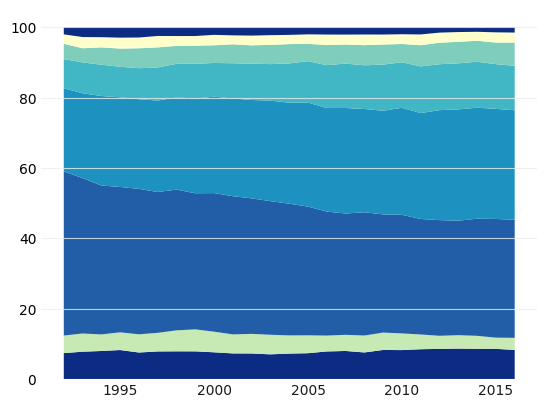

In [241]:
x=range(1992,2017)
y=[ [x for x  in df_age_wide['0-9'].values], [x for x  in df_age_wide['10-19'].values], 
   [x for x  in df_age_wide['20-29'].values], [x for x  in df_age_wide['30-39'].values],
  [x for x  in df_age_wide['40-49'].values], [x for x  in df_age_wide['50-59'].values],
  [x for x  in df_age_wide['60-69'].values], [x for x  in df_age_wide['70+'].values]]
 
# Plot
plt.stackplot(x,y)
plt.savefig('output_age_stacked.pdf')

In [242]:
x

range(1992, 2017)

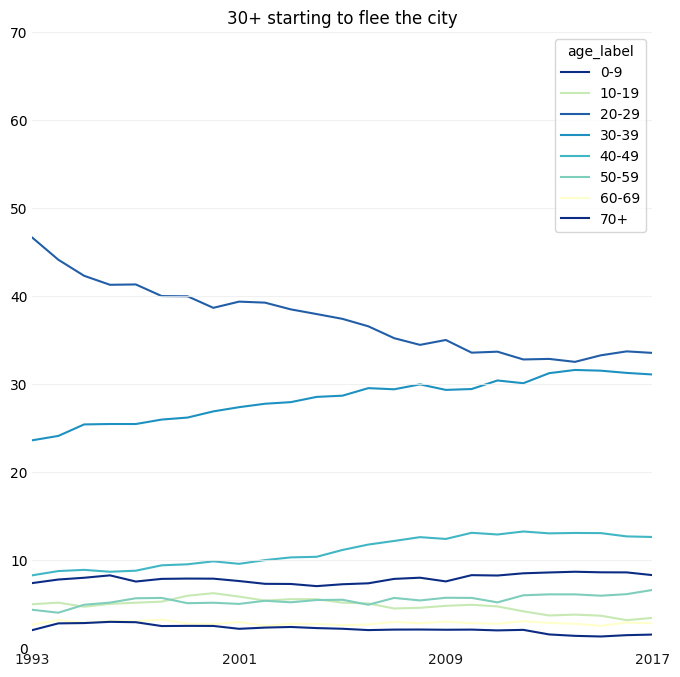

In [243]:
ax = df_age_wide.plot(x="StichtagDatJahr",title='30+ starting to flee the city', figsize=(8,8))
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.grid(False, axis='x')
ax.set_ylim(0, 70)
ax.set_xlim(1993, 2017)
ax.set_xticks(list(range(1993,2018,8)))
ax.set_xticklabels([1993,2001,2009, 2017])
plt.savefig('output_age.pdf')

Is there a difference between the sexes?

In [244]:
#calculate the sum of the percnetage by year and age
df_sex = df_percentage_all
df_sex = df_sex.groupby(['StichtagDatJahr', 'age_label', 'SexKurz'], as_index=False).percentage.sum()
df_sex.head()


,StichtagDatJahr,age_label,SexKurz,percentage
0,1993,0-9,M,3.607742
1,1993,0-9,W,3.788387
2,1993,10-19,M,2.121290
3,1993,10-19,W,2.869677
4,1993,20-29,M,23.767742


In [245]:
df_sex_wide_f = df_sex[df_sex['SexKurz']=="W"].groupby([ 'StichtagDatJahr', 'SexKurz', 'age_label']).percentage.sum().unstack().reset_index()
df_sex_wide_m = df_sex[df_sex['SexKurz']=="M"].groupby([ 'StichtagDatJahr', 'SexKurz', 'age_label']).percentage.sum().unstack().reset_index()

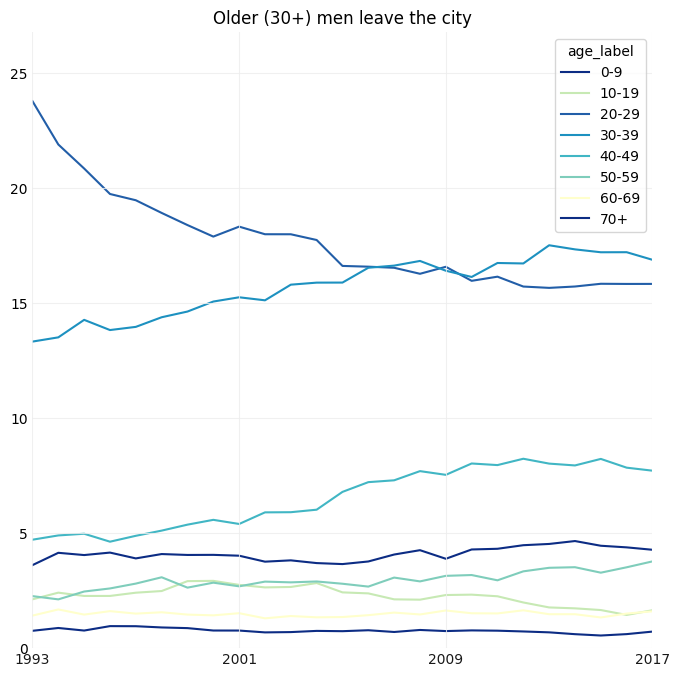

In [246]:
ax = df_sex_wide_m.plot(x="StichtagDatJahr", title='Older (30+) men leave the city', figsize=(8,8))
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_sex.percentage)+3)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(1993, 2017)
ax.set_xticks(list(range(1993,2018,8)))
ax.set_xticklabels([1993,2001,2009, 2017])
plt.savefig('output_men.pdf')

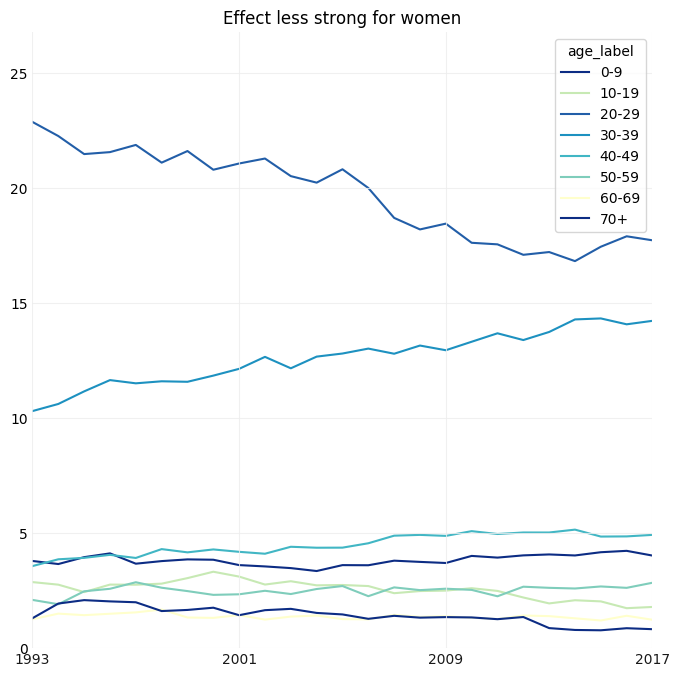

In [247]:
ax = df_sex_wide_f.plot(x="StichtagDatJahr", title='Effect less strong for women', figsize=(8,8))
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_sex.percentage)+3)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(1993, 2017)
ax.set_xticks(list(range(1993,2018,8)))
ax.set_xticklabels([1993,2001,2009, 2017])
plt.savefig('output_women.pdf')

Is there a difference between marital status?

In [248]:
#calculate the sum of the percnetage by year
df_marital = df_percentage_all
df_marital = df_marital.groupby(['StichtagDatJahr', 'Ziv2Lang'], as_index=False).percentage.sum()
df_marital.head()
set(df_marital.Ziv2Lang)


{'Aufgelöste Partnerschaft',
 'Geschieden',
 'In eingetragener Partnerschaft',
 'Ledig',
 'Unbekannt',
 'Verheiratet',
 'Verwitwet'}

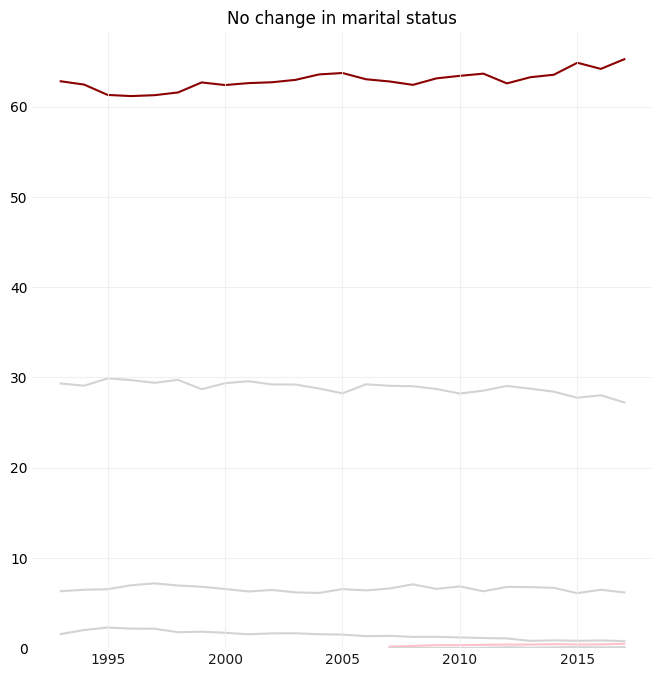

In [249]:
ax = df_marital[df_marital['Ziv2Lang']=="Aufgelöste Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, figsize=(8,8),title = "No change in marital status")
df_marital[df_marital['Ziv2Lang']=="Geschieden"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="In eingetragener Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Ledig"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='darkred', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Aufgelöste Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Unbekannt"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Verheiratet"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Verwitwet"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_marital.percentage)+3)
plt.savefig('output_marital.pdf')

# One explenation? They stay longer

In [250]:
df = pd.read_csv('total_population.csv')
 
df_2000 = df[df.StichtagDatJahr == 2000]
df_2017 = df[df.StichtagDatJahr == 2017]
df_2017.head()

,StichtagDatJahr,QuarSort,QuarCd,QuarLang,AlterVSort,AlterVKurz,AlterV05Sort,AlterV05Kurz,HerkunftLang,HerkunftSort,SexCd,SexKurz,AnzBestWir
294990,2017,11,11,Rathaus,0,0,1,0-4,Schweizer/in,1,1,M,6
294991,2017,11,11,Rathaus,0,0,1,0-4,Schweizer/in,1,2,W,6
294992,2017,11,11,Rathaus,0,0,1,0-4,Ausländer/in,2,1,M,4
294993,2017,11,11,Rathaus,0,0,1,0-4,Ausländer/in,2,2,W,2
294994,2017,11,11,Rathaus,1,1,1,0-4,Schweizer/in,1,1,M,6


In [251]:
df_2000 = df_2000.groupby(['AlterV05Kurz','AlterV05Sort'], as_index=False).AnzBestWir.sum()
df_2017 = df_2017.groupby(['AlterV05Kurz','AlterV05Sort'], as_index=False).AnzBestWir.sum()

In [252]:
#df_1993_wide = df_1993.groupby(['AlterV05Sort','AlterV05Kurz']).AnzBestWir.sum().unstack().reset_index()
df_2000.head()

,AlterV05Kurz,AlterV05Sort,AnzBestWir
0,0-4,1,15554
1,10-14,3,13551
2,100 u. älter,21,42
3,15-19,4,14471
4,20-24,5,26514


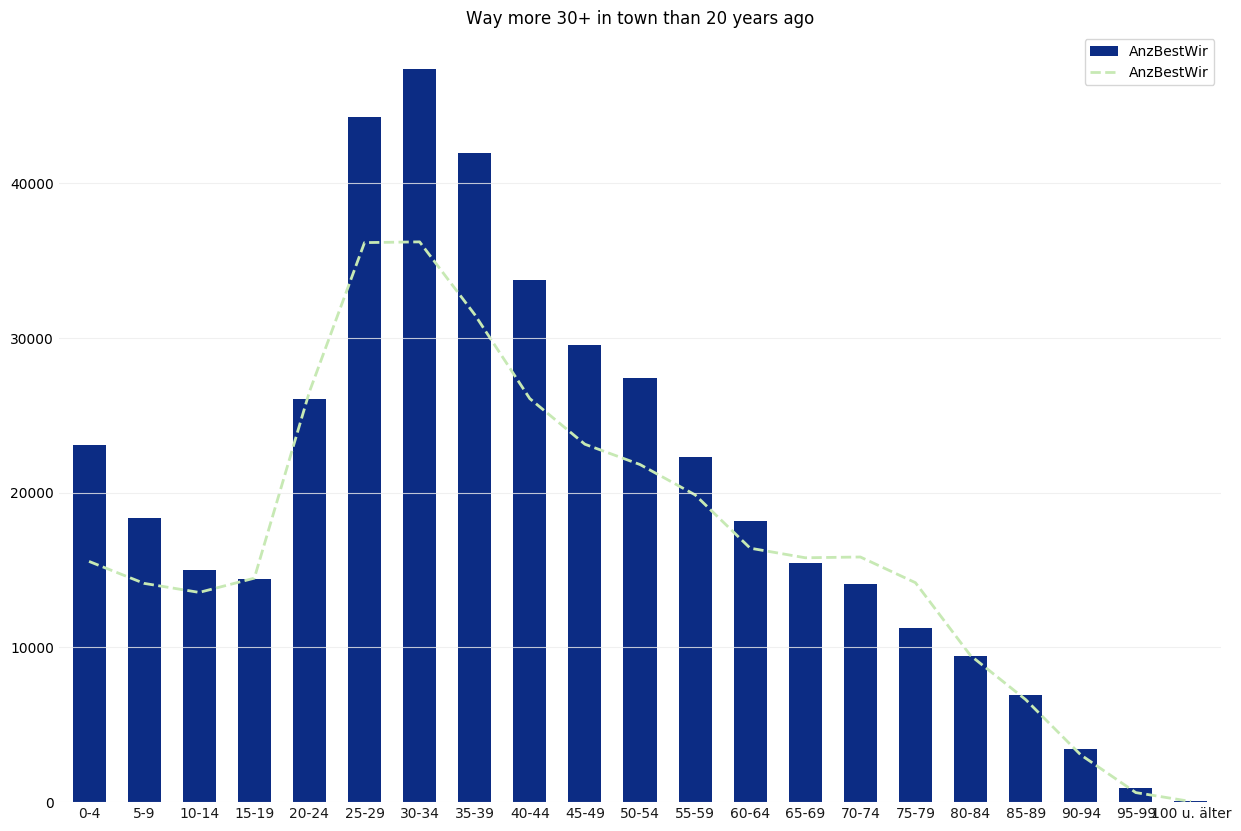

In [296]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


ax = df_2017.sort_values('AlterV05Sort').plot(x='AlterV05Kurz', y="AnzBestWir",kind="bar",width=0.6, title= "Way more 30+ in town than 20 years ago", 
                                              figsize=(15,10), color=cycle[0])
df_2000.sort_values('AlterV05Sort').plot(x='AlterV05Kurz', y="AnzBestWir",kind="line", linewidth=2,linestyle="--", color=cycle[1], ax=ax)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.grid(False, axis='x')

plt.savefig('output_population.pdf')


# One explanation of the change? Babys

In [262]:
df = pd.read_csv('reasons_to_leave.csv')
df = df[df['Jahr']==2016]
df = df.drop('Jahr', axis=1)
df = df.T
df

,1
Housing,23
Family,27
Education,13
Job,20
City life,7
Other,10


In [263]:
df.columns = ['Percentage']
df

,Percentage
Housing,23
Family,27
Education,13
Job,20
City life,7
Other,10


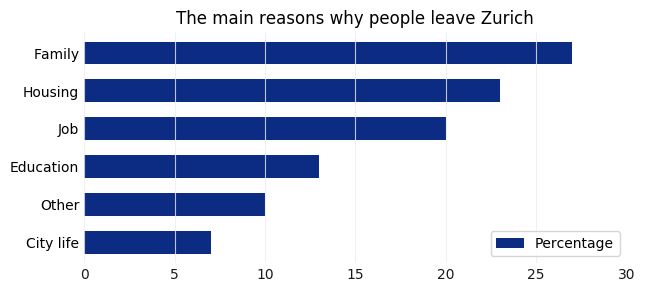

In [295]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax=df.sort_values('Percentage', ascending=True).plot(kind="barh", width=0.6, color=cycle[0], figsize=(7,3), title="The main reasons why people leave Zurich")
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(0,30)
ax.grid(False, axis='y')
plt.savefig('output_reasons.pdf')

In [298]:
df = pd.read_csv('average_first_mom.csv')
df = df[df['Herkunft']=="Total"]
df.head()

,StichtagDatJahr,Herkunft,HerkunftCd,DurchAlter
0,1993,Total,0,29.9
3,1994,Total,0,29.9
6,1995,Total,0,30.0
9,1996,Total,0,29.9
12,1997,Total,0,30.2


In [327]:
ax = df[(df['StichtagDatJahr']==1993) | 
        (df['StichtagDatJahr']==2000) |
        (df['StichtagDatJahr']==2007) |
        (df['StichtagDatJahr']==2017)  ].plot(x="StichtagDatJahr", 
                                              y='DurchAlter', 
                                              title = "Womens have their first kid later in their lives", 
                                              kind="bar", width=0.3, color=cycle[0], figsize=(4,5))
ax.xaxis.label.set_visible(False)
ax.set_ylim(20, 40)
plt.savefig('output_marital.pdf')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.grid(False, axis='x')
ax.set_ylim(20,35)
plt.savefig('output_kid.pdf')

ValueError: 'lines' is not a valid plot kind

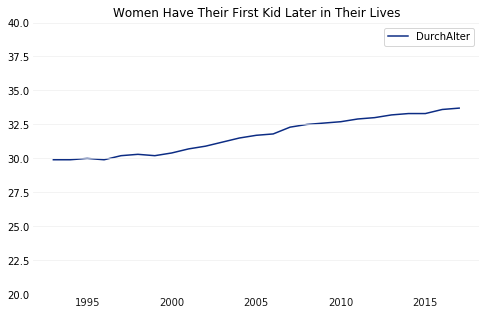

In [343]:
ax = df.plot(x="StichtagDatJahr",y='DurchAlter', title = "Women Have Their First Kid Later in Their Lives",kind="line", color=cycle[0], figsize=(8,5))
ax.xaxis.label.set_visible(False)
plt.savefig('output_marital.pdf')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.grid(False, axis='x')
ax.set_ylim(20,40)
plt.savefig('output_kid.pdf')